In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4


1 spectrum  in use
 
Spectral Data File: 0886071001_PN9grpspec.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.446e-03 +/- 7.364e-04 (51.0 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-6
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.756e+04 sec
 Using fit statistic: chi
 Using Background File                0886071001_PN9spec_bkg.fits
  Background Exposure Time: 1.756e+04 sec
 Using Response (RMF) File            0886071001_PN9spec.rmf for Source 1
 Using Auxiliary Response (ARF) File  0886071001_PN9spec.arf



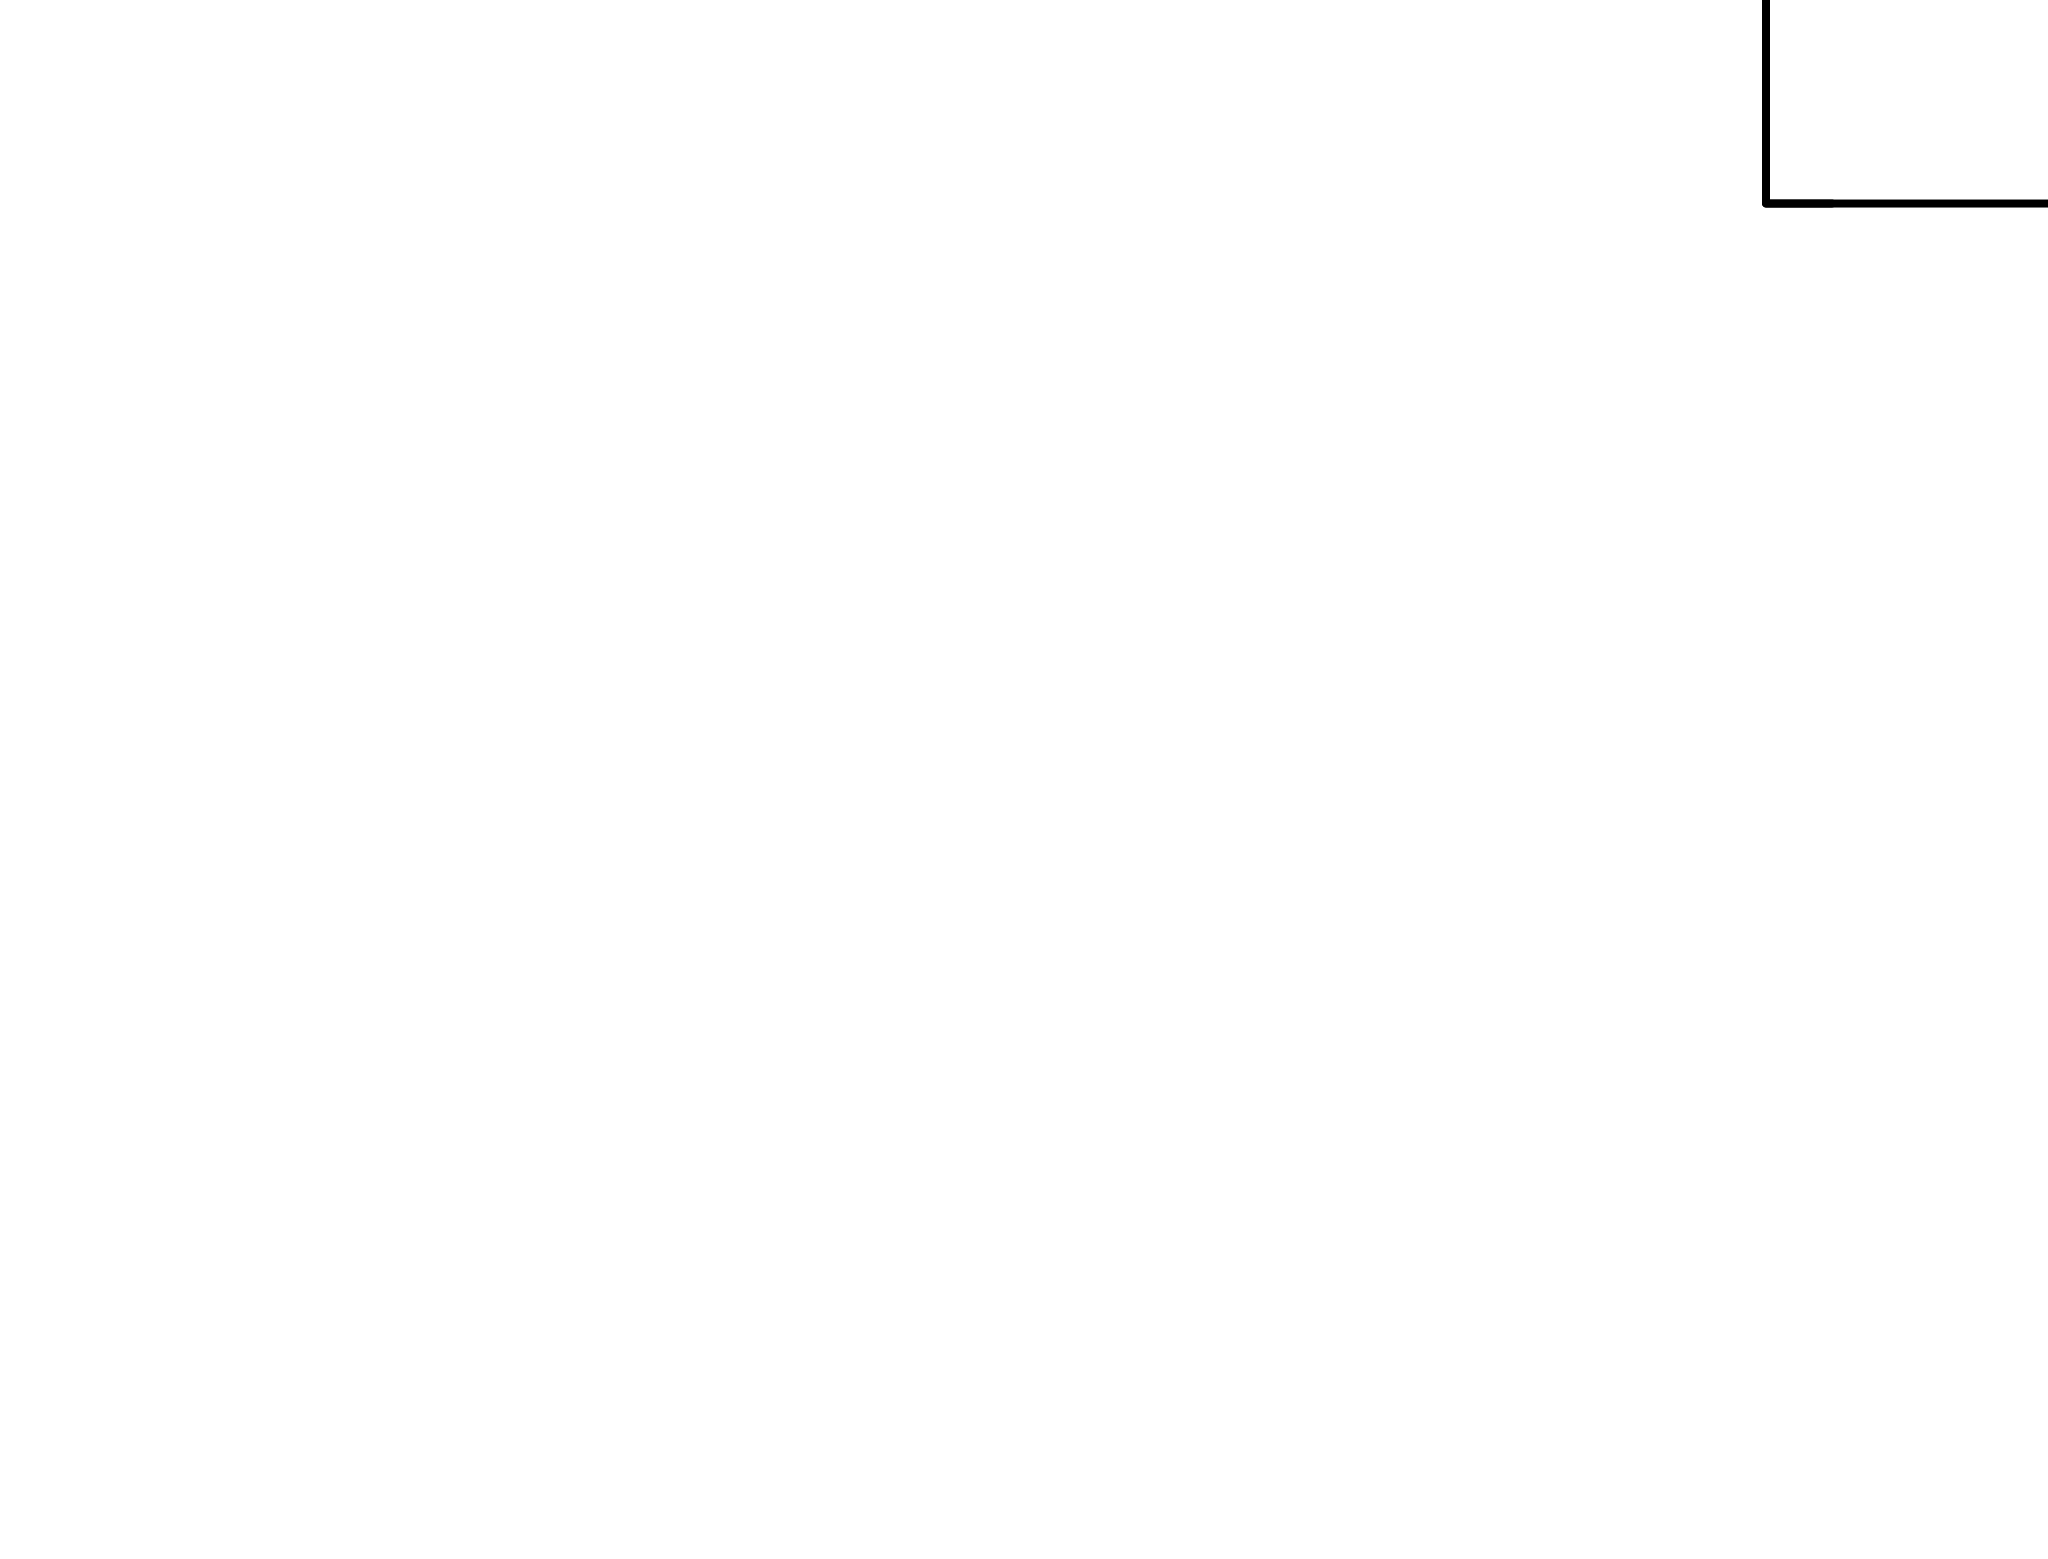

In [2]:
spec_fnames = glob.glob('*grpspec*')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")
#spec.ignore("**-0.2 12.0-**")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              9.958580e+12     using 6 bins.

Tes

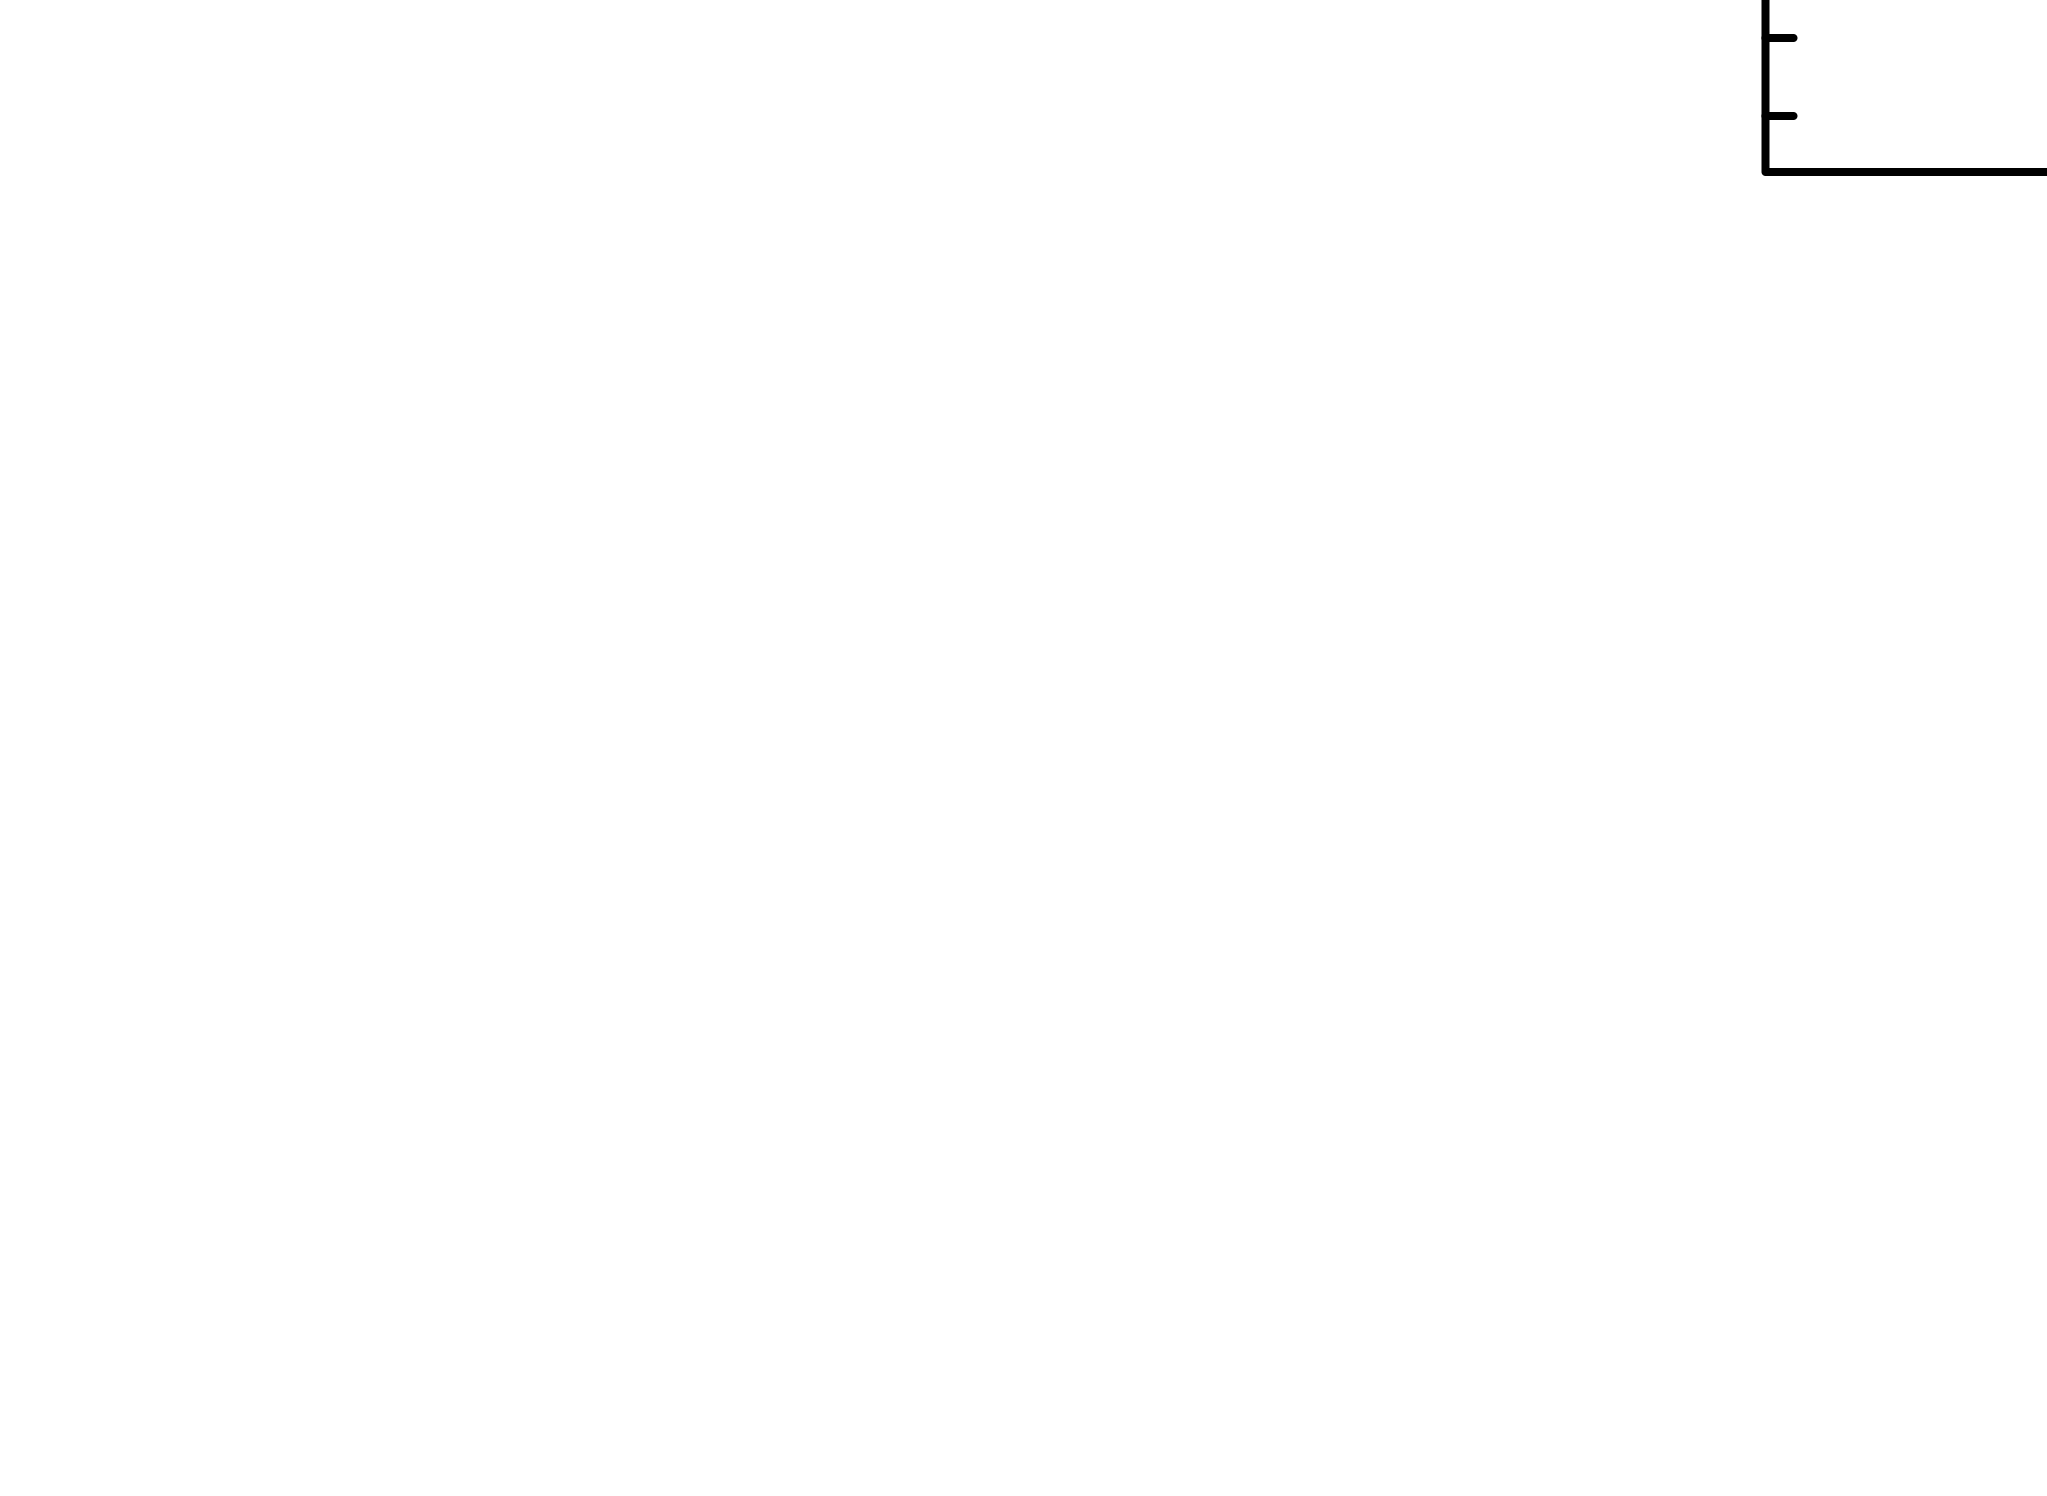

In [3]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

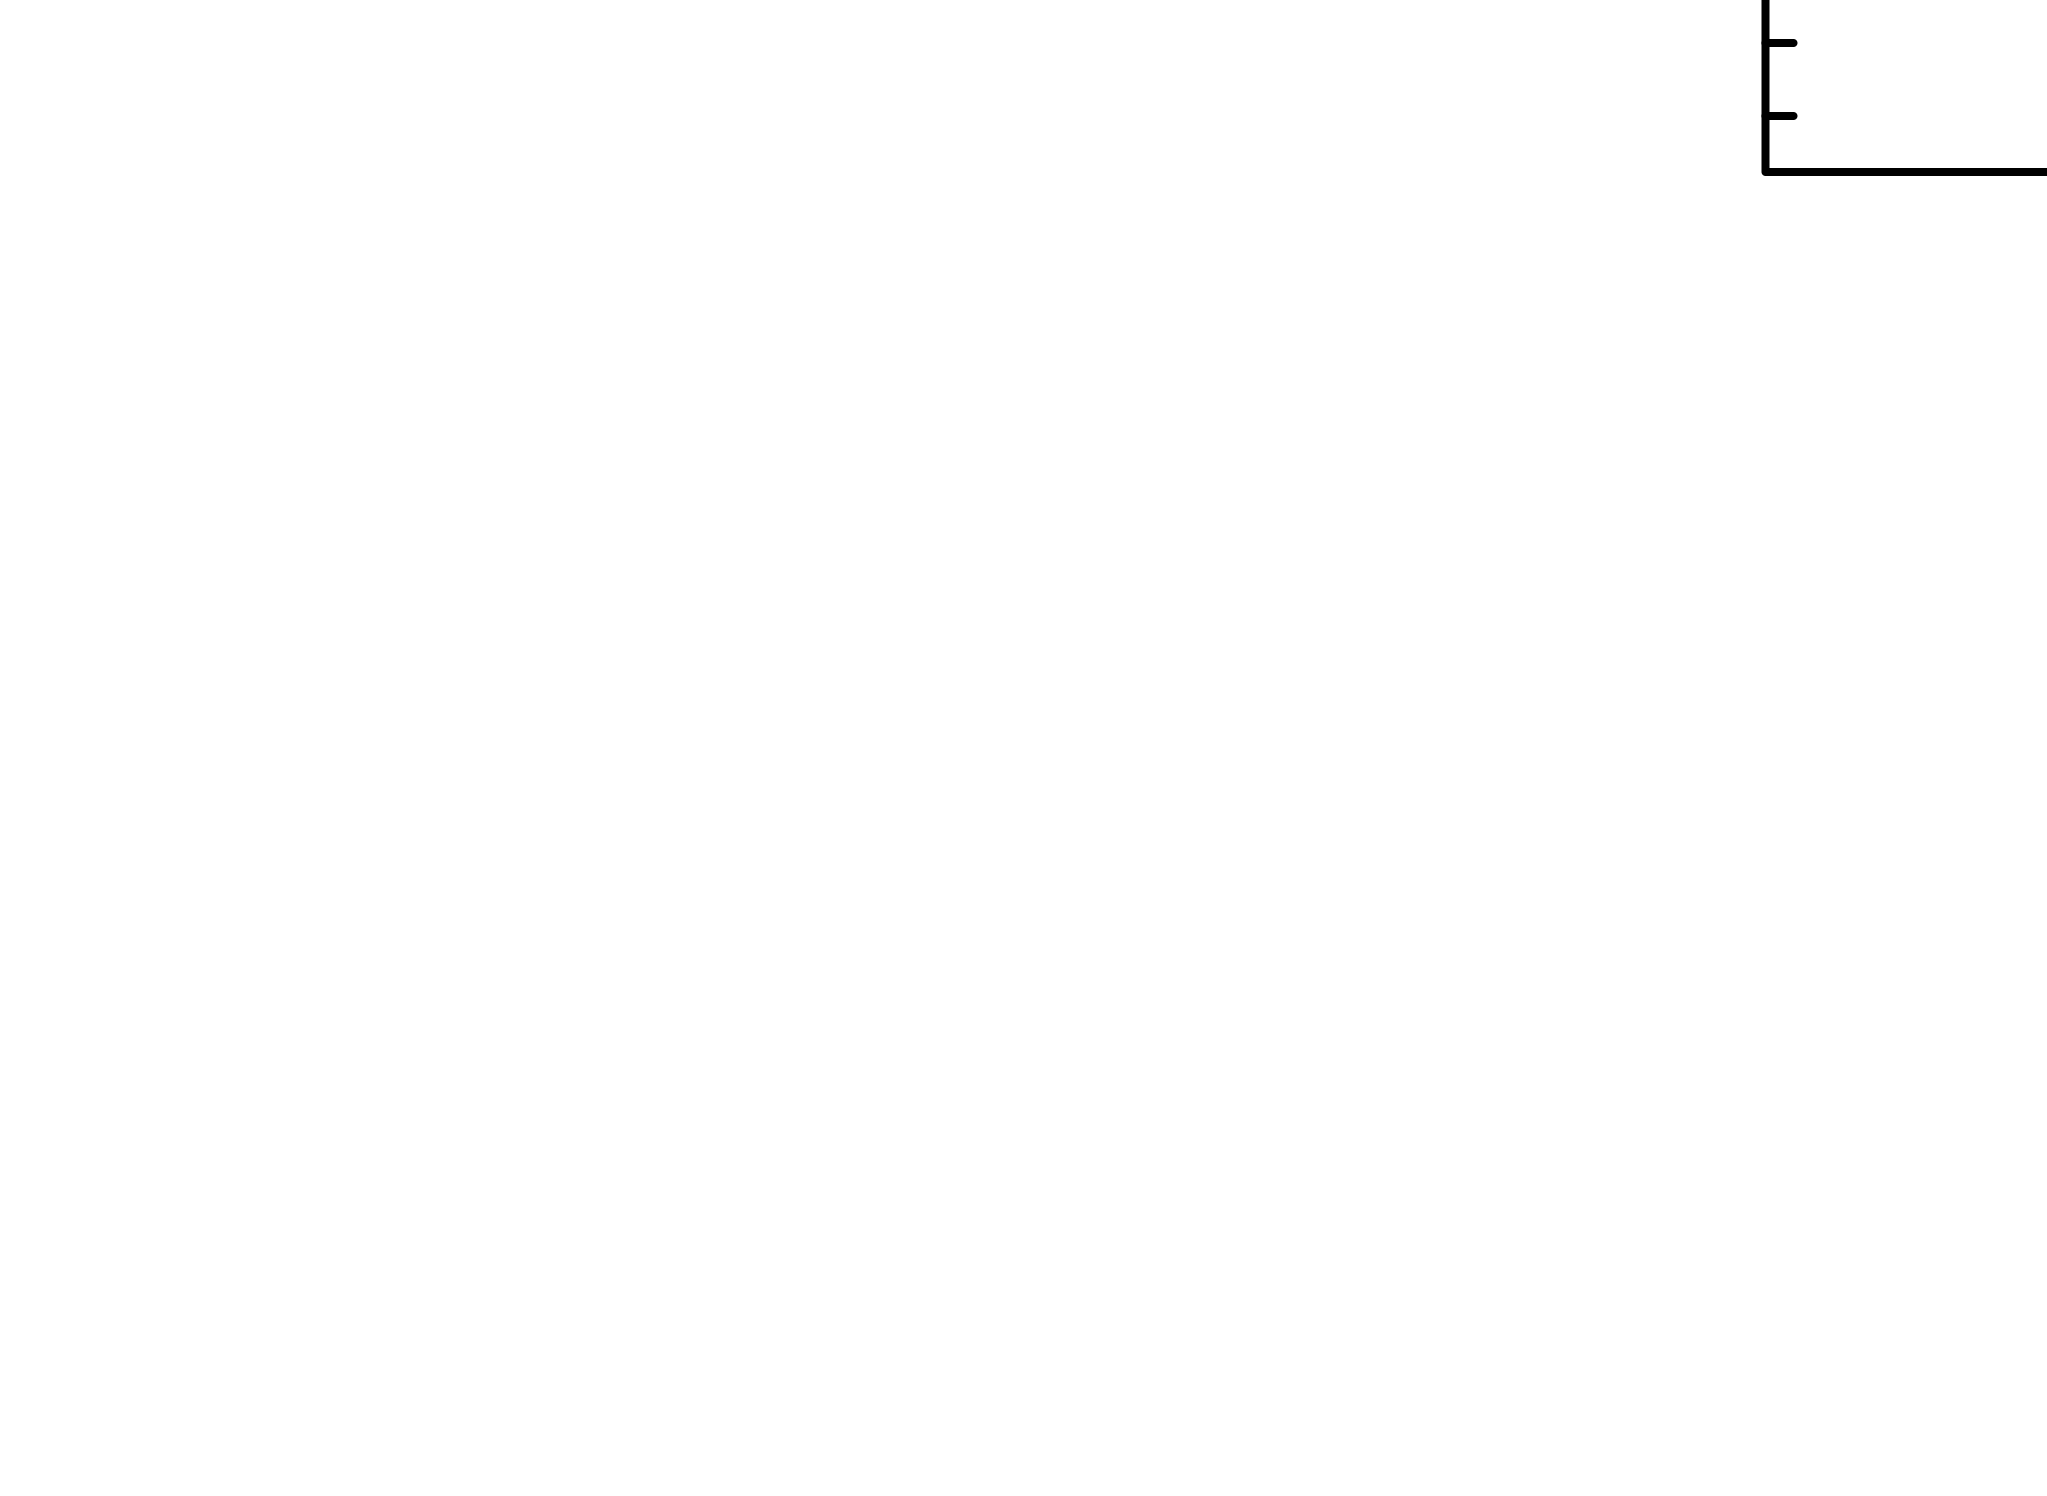


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.254077e+11     using 6 bins.

Test statistic : Chi-Squared              3.254077e+11     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
3.21021      1.68492      -3       1.27580       13.9693   1.06095e-05
2.16553      142002       -4       1.48611       18.1886   1.29213e-05
2.15849      13524.5      -5       1.48703       17.9408   1.30918e-05
2.1

In [4]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

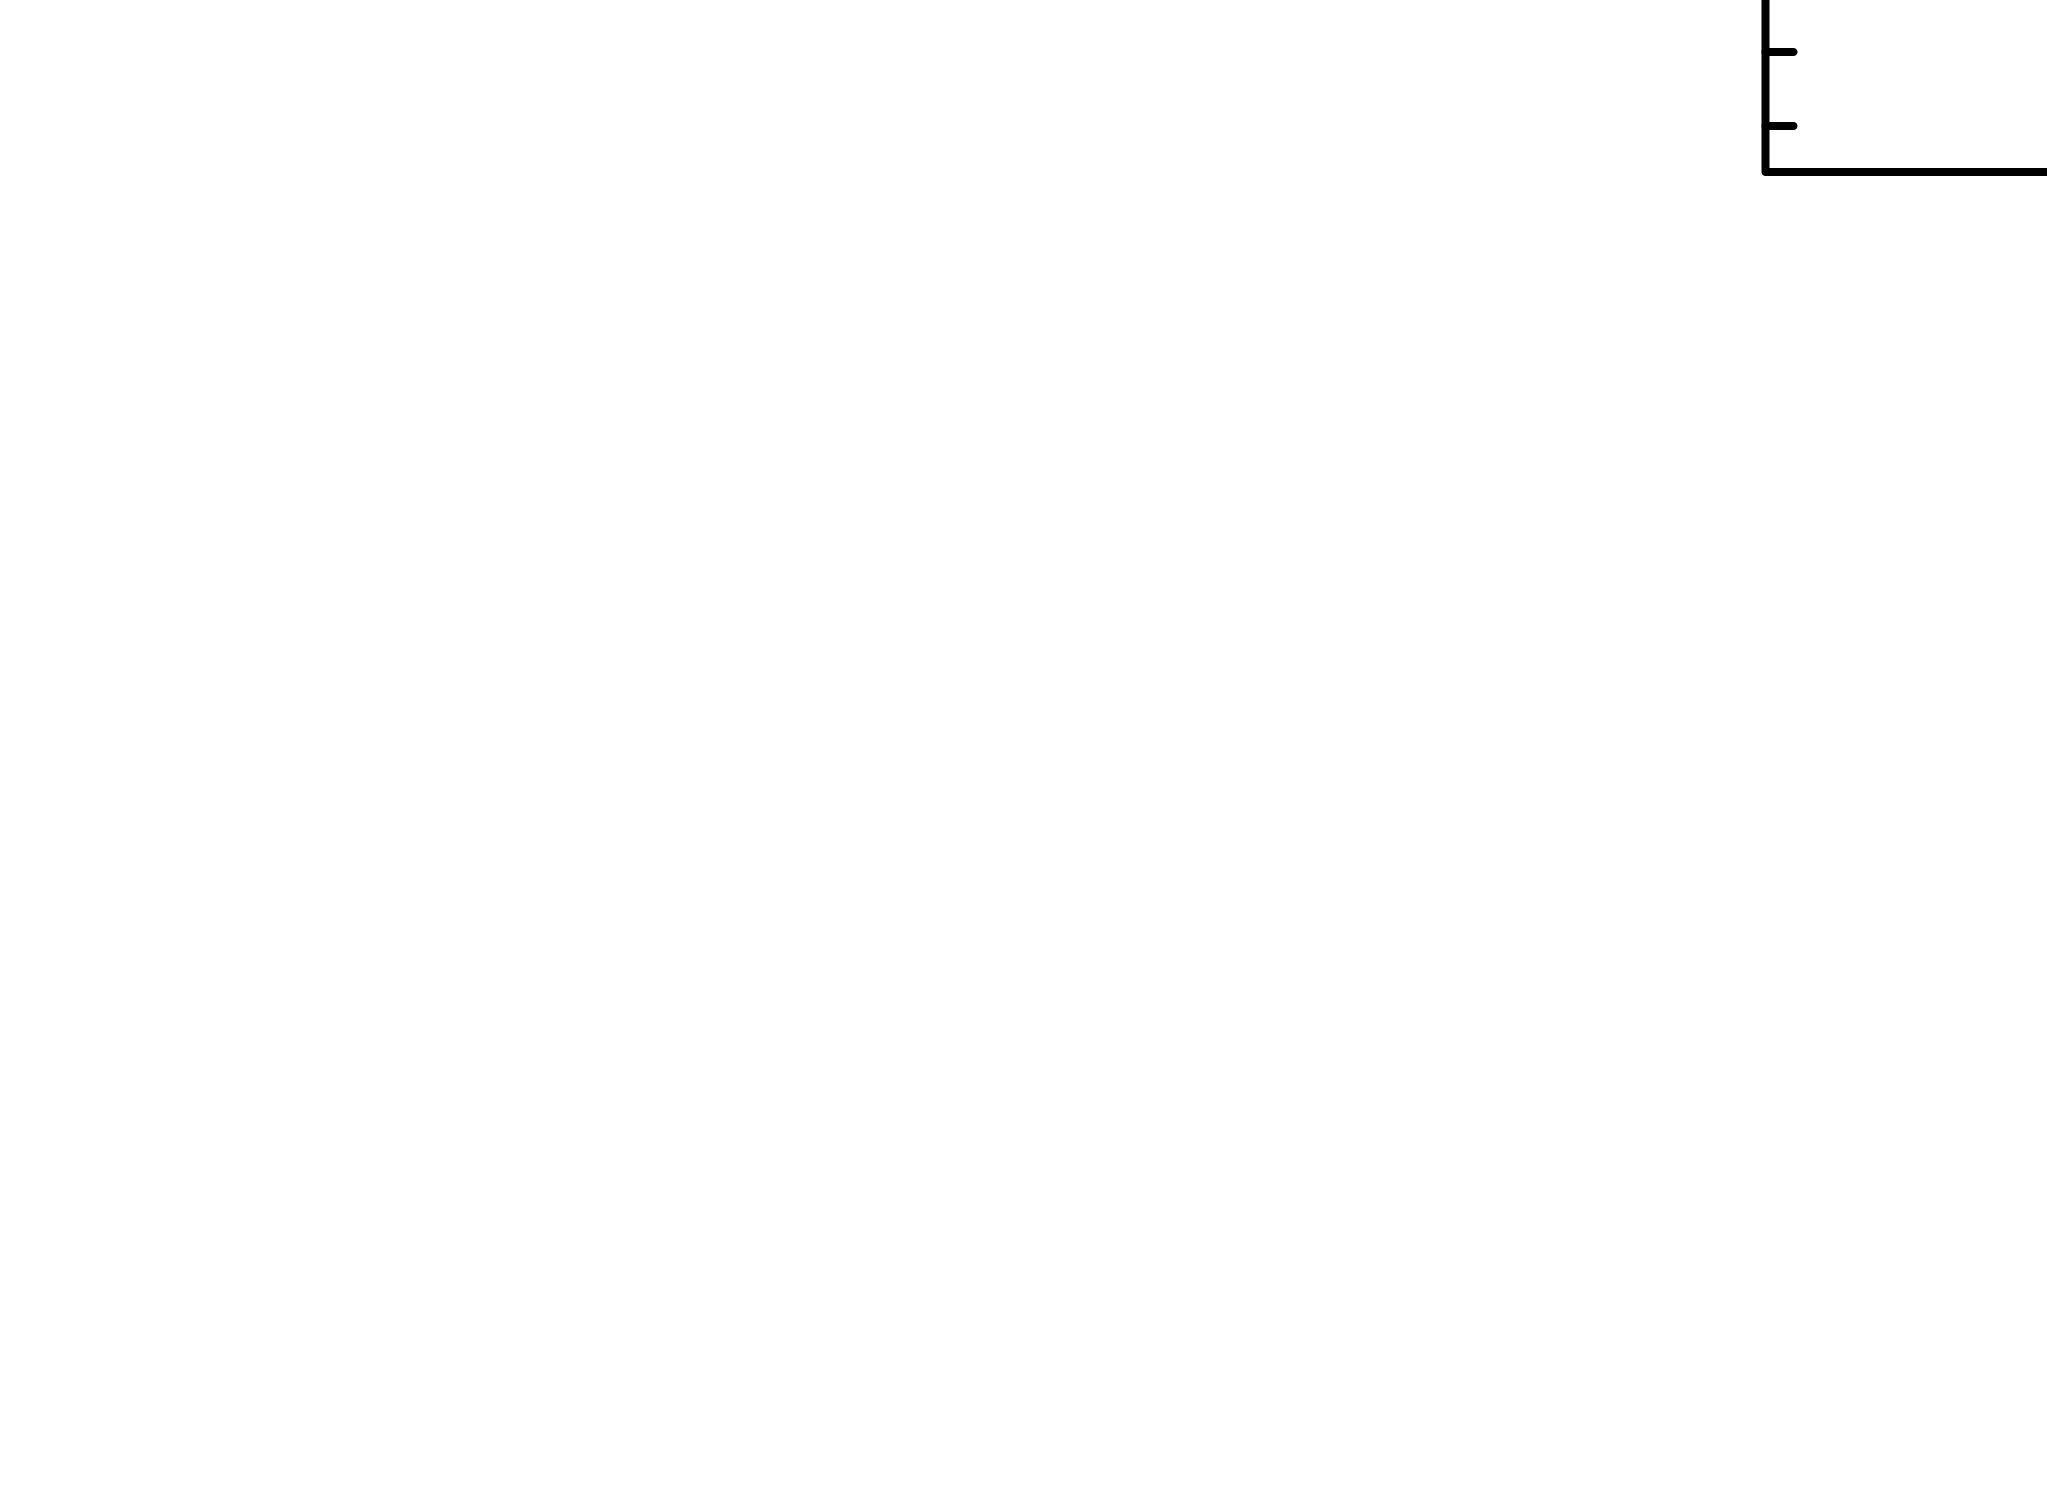


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.982908e+12     using 6 bins.

Test statistic : Chi-Squared              1.982908e+12     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
2.41712      0.519433     -2       1.23224       1.26682   6.22281e-06
2.35985      123413       -3       1.58286       1.53549   9.19976e-06
2.10251      107478       -4       1.67687       1.59508   1.08581e-05
2

In [5]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

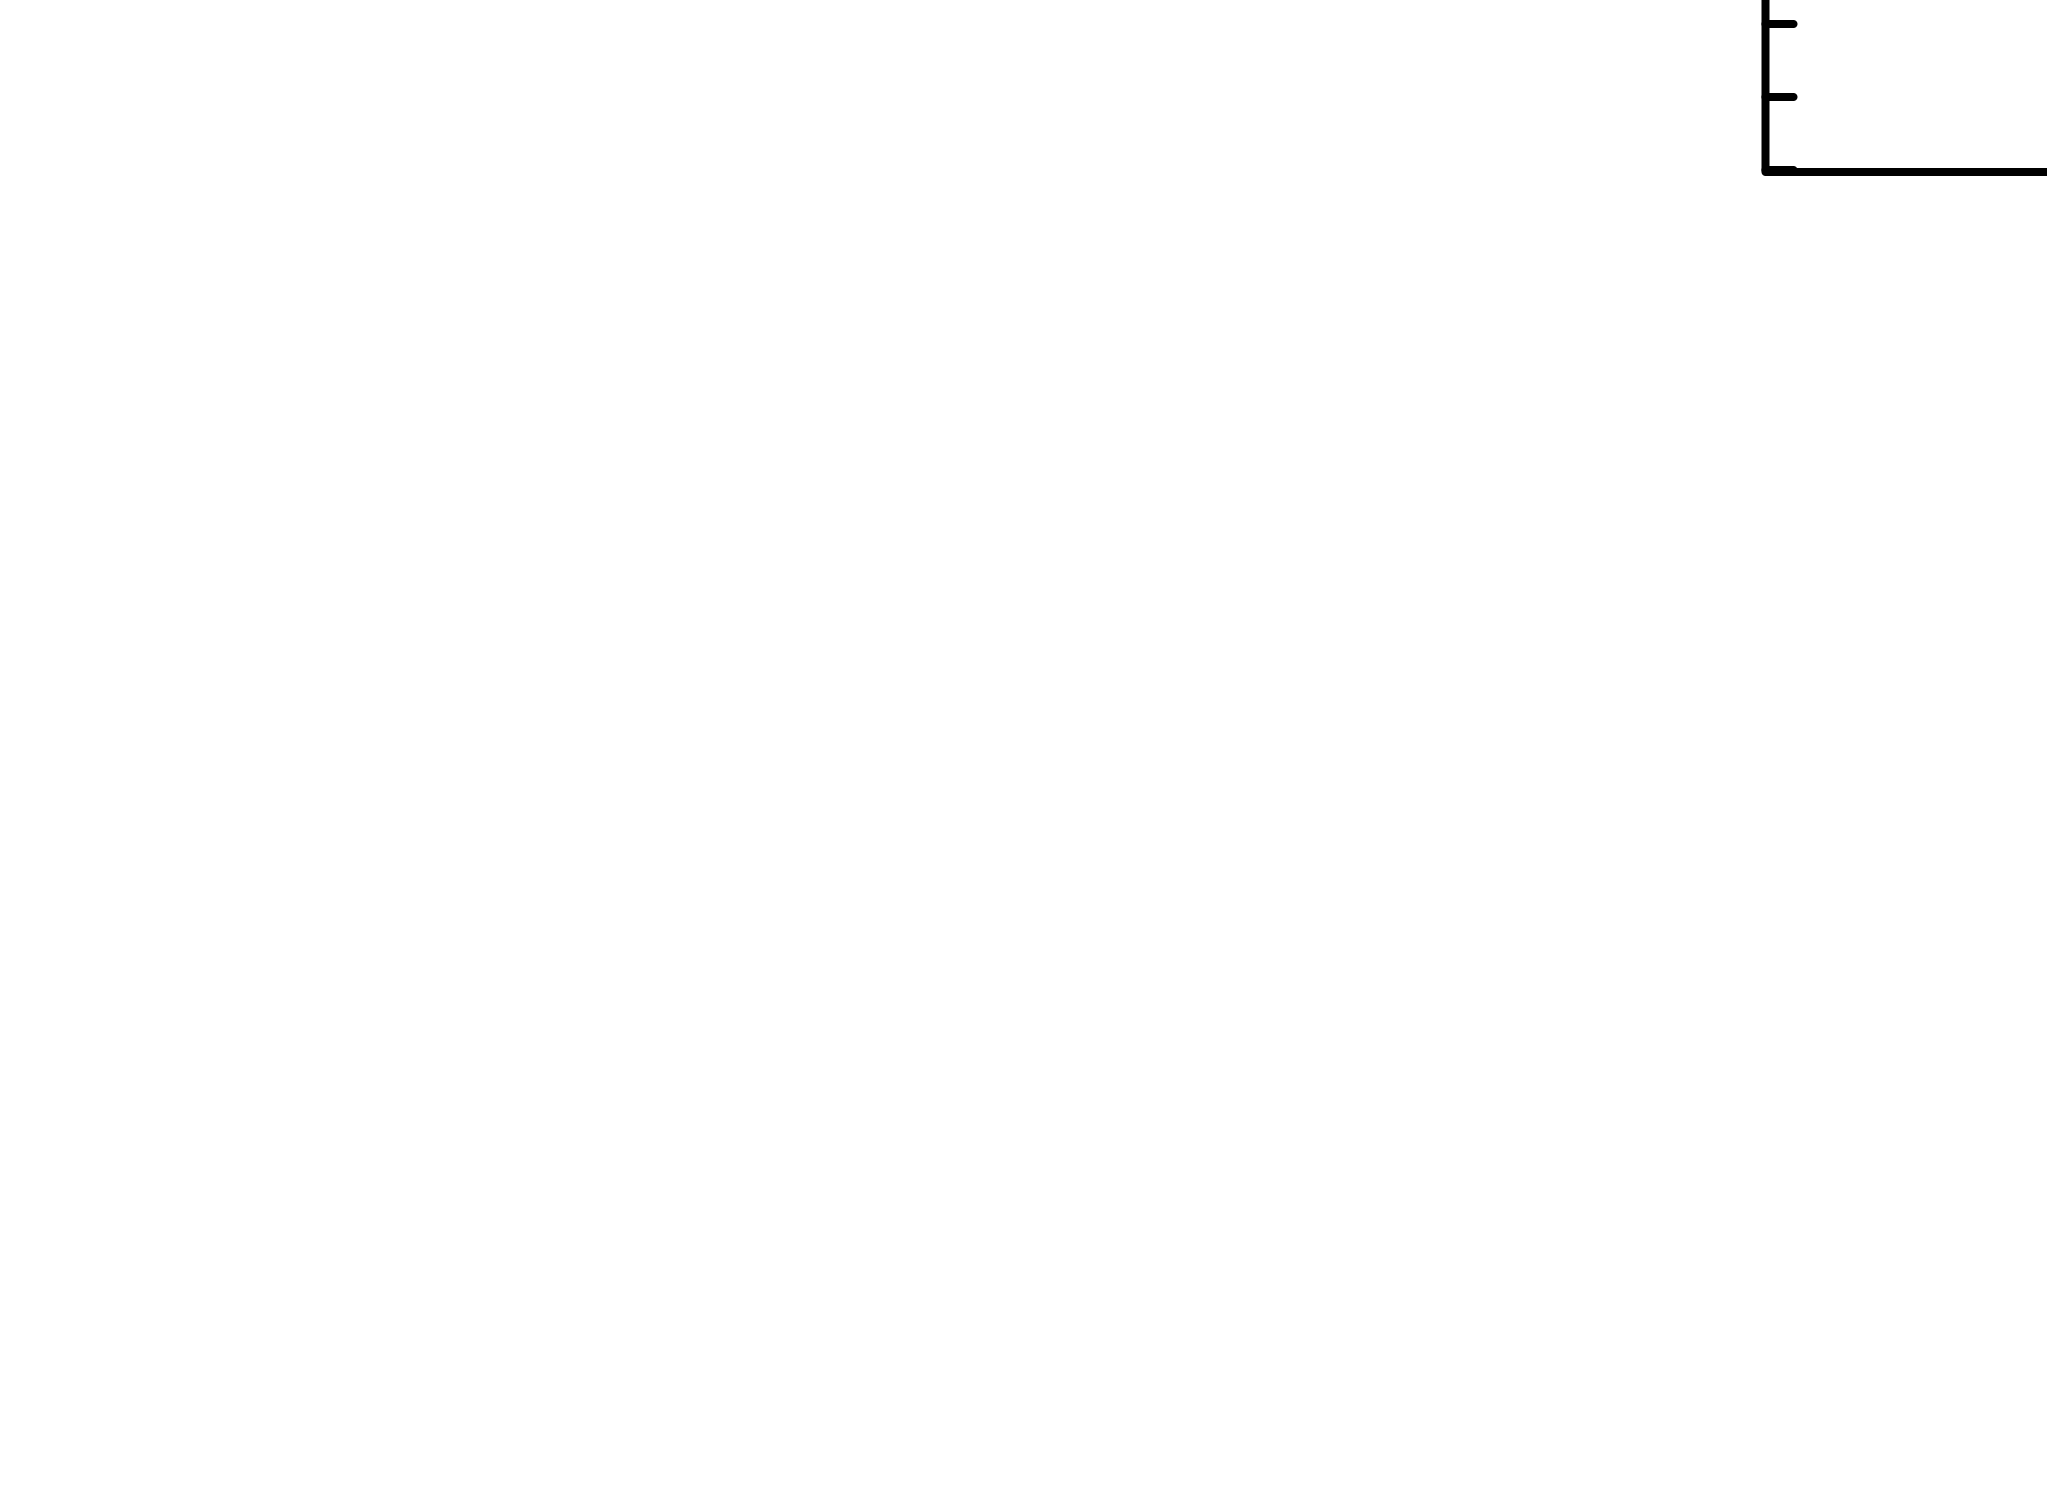


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.148624e+11     using 6 bins.

Test statistic : Chi-Squared              1.148624e+11     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
26.9654      1.79878      -3      0.384817       11.5062   4.8

In [6]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [7]:
AllModels.calcFlux(".2 12.0")

 Model Flux 7.7988e-06 photons (5.7788e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [8]:
#plx = 2.3643
d_kpc = 8
F_x = 5.7788*10**-14

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

4.423837043893044e+32


In [9]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

8
32.645799120954536


In [10]:
F_opt = 1.05*10**-5 * 10**(-0.4*20.7)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  5.510478332622621e-14
F_x / F_opt:  0.02064836504527208


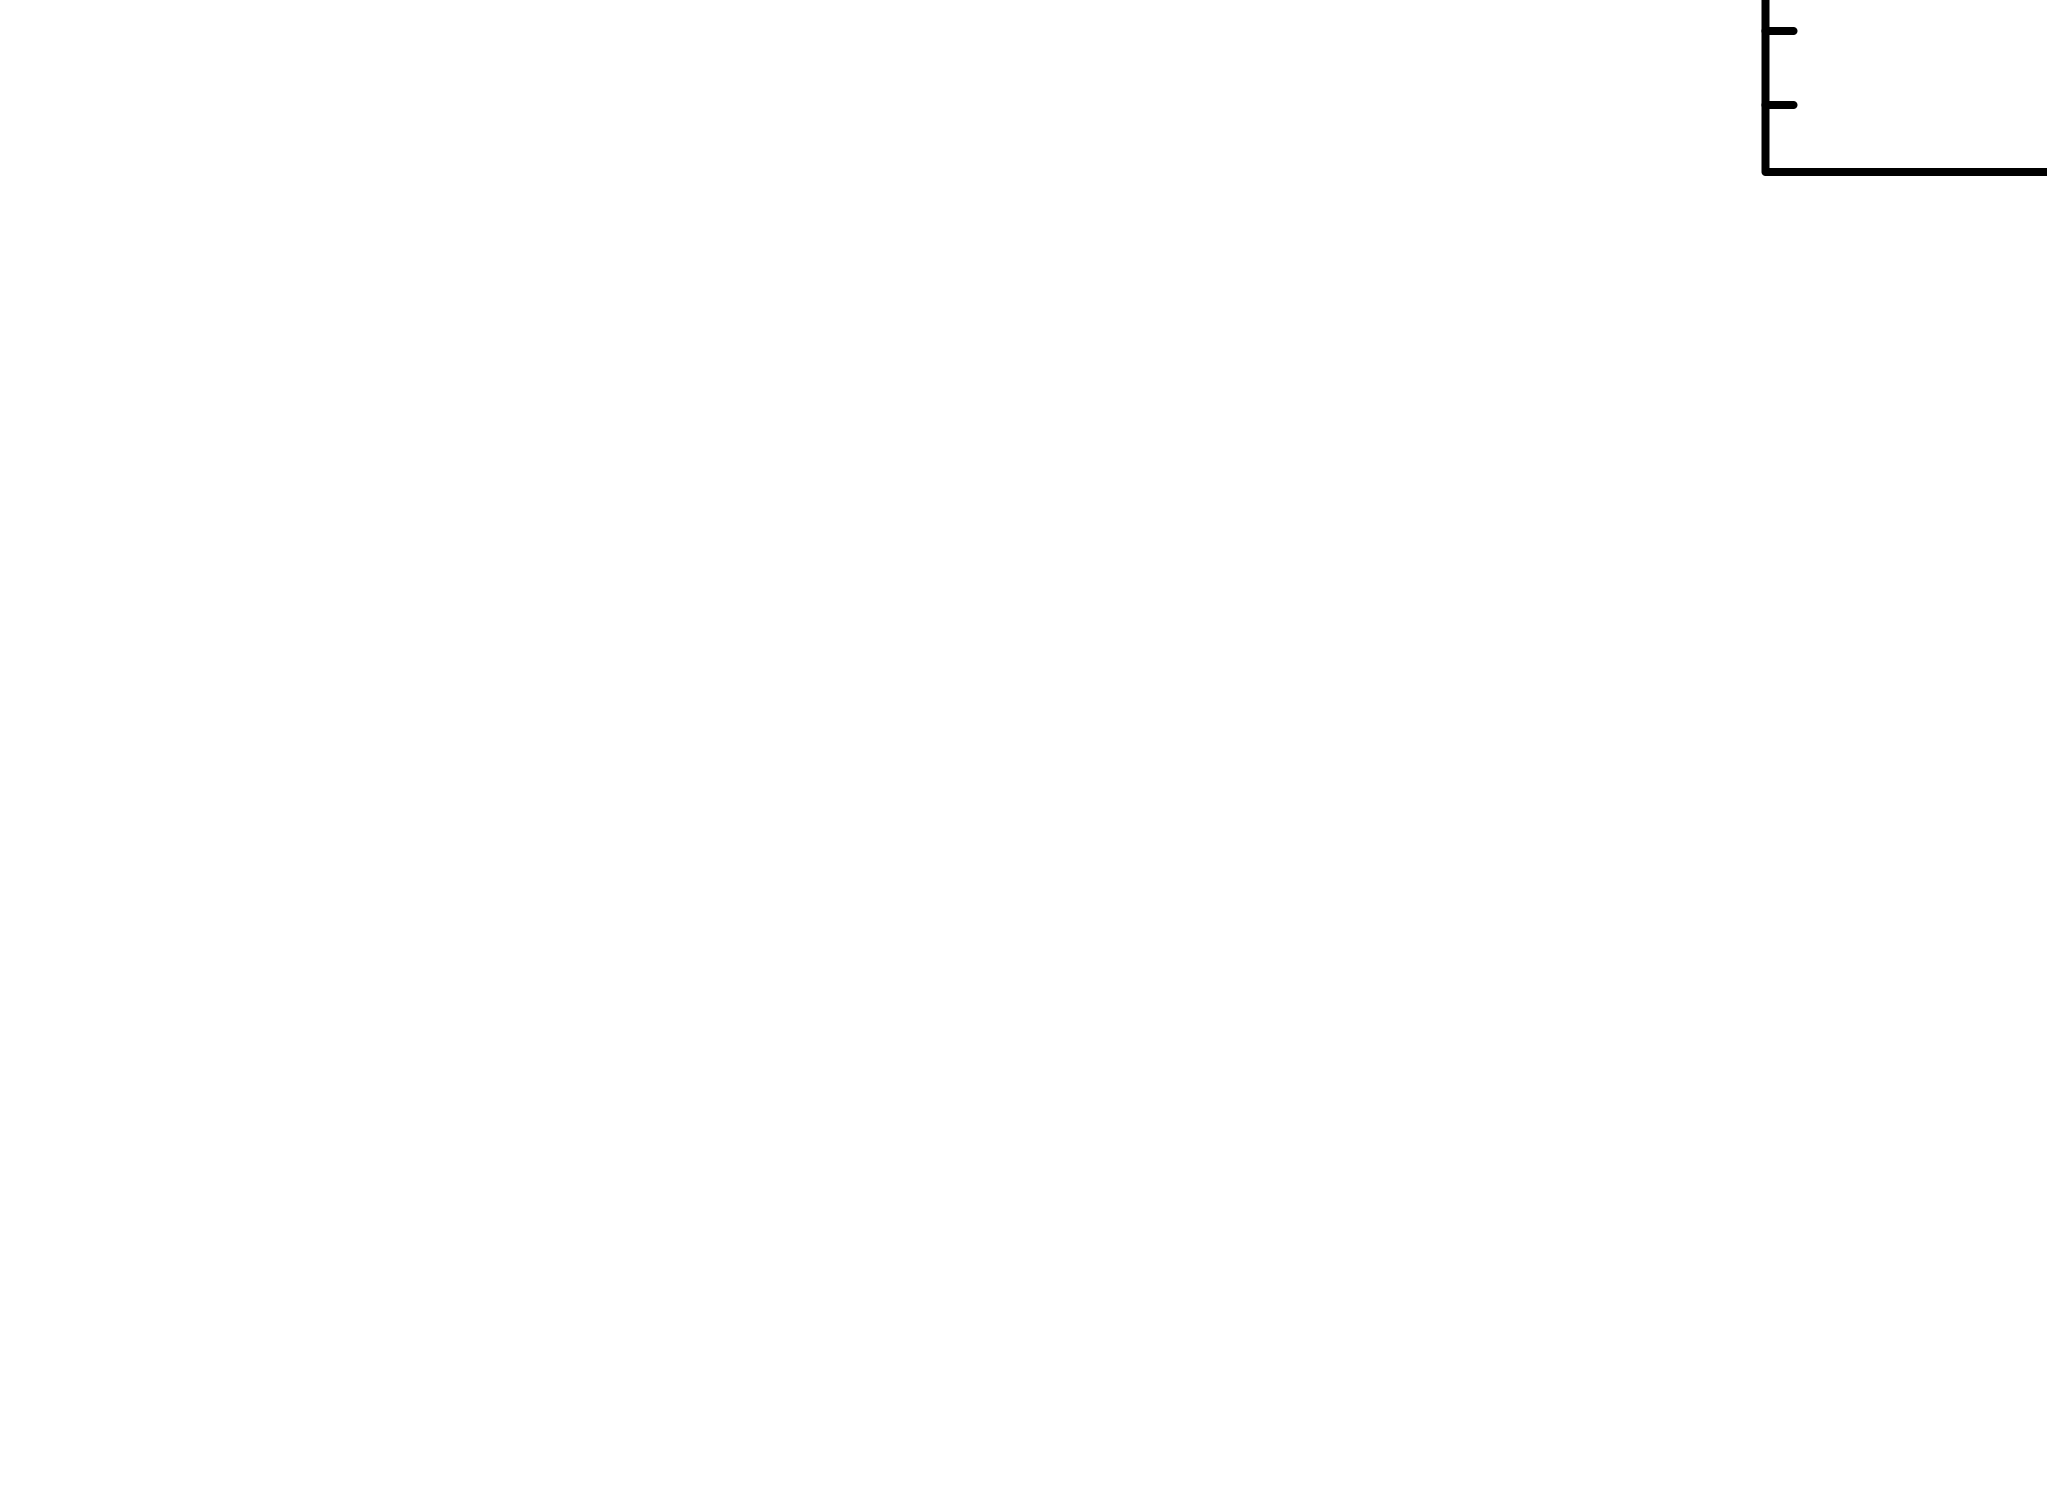


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.148624e+11     using 6 bins.

Test statistic : Chi-Squared              1.148624e+11     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              2.059040e+10     using 6 bins.

Test statistic : Chi-Squared              2.059040e+10     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees o

In [11]:
AllModels.clear()
mo = Model("tbabs*apec")
mo.apec.Abundanc = 0.3
Fit.perform()
Plot("data resid")


Model TBabs<1>*raymond<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   raymond    kT         keV      1.00000      +/-  0.0          
   3    2   raymond    Abundanc            1.00000      frozen
   4    2   raymond    Redshift            0.0          frozen
   5    2   raymond    norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              7.430348e+10     using 6 bins.

Test statistic : Chi-Squared              7.430348e+10     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.488386e+10     using 6 bins.

Test statistic : Chi-Squared              1.488386e+10     using 6 bins.
 Null hypothesis probability of 0.000000e+00 with 3 degree

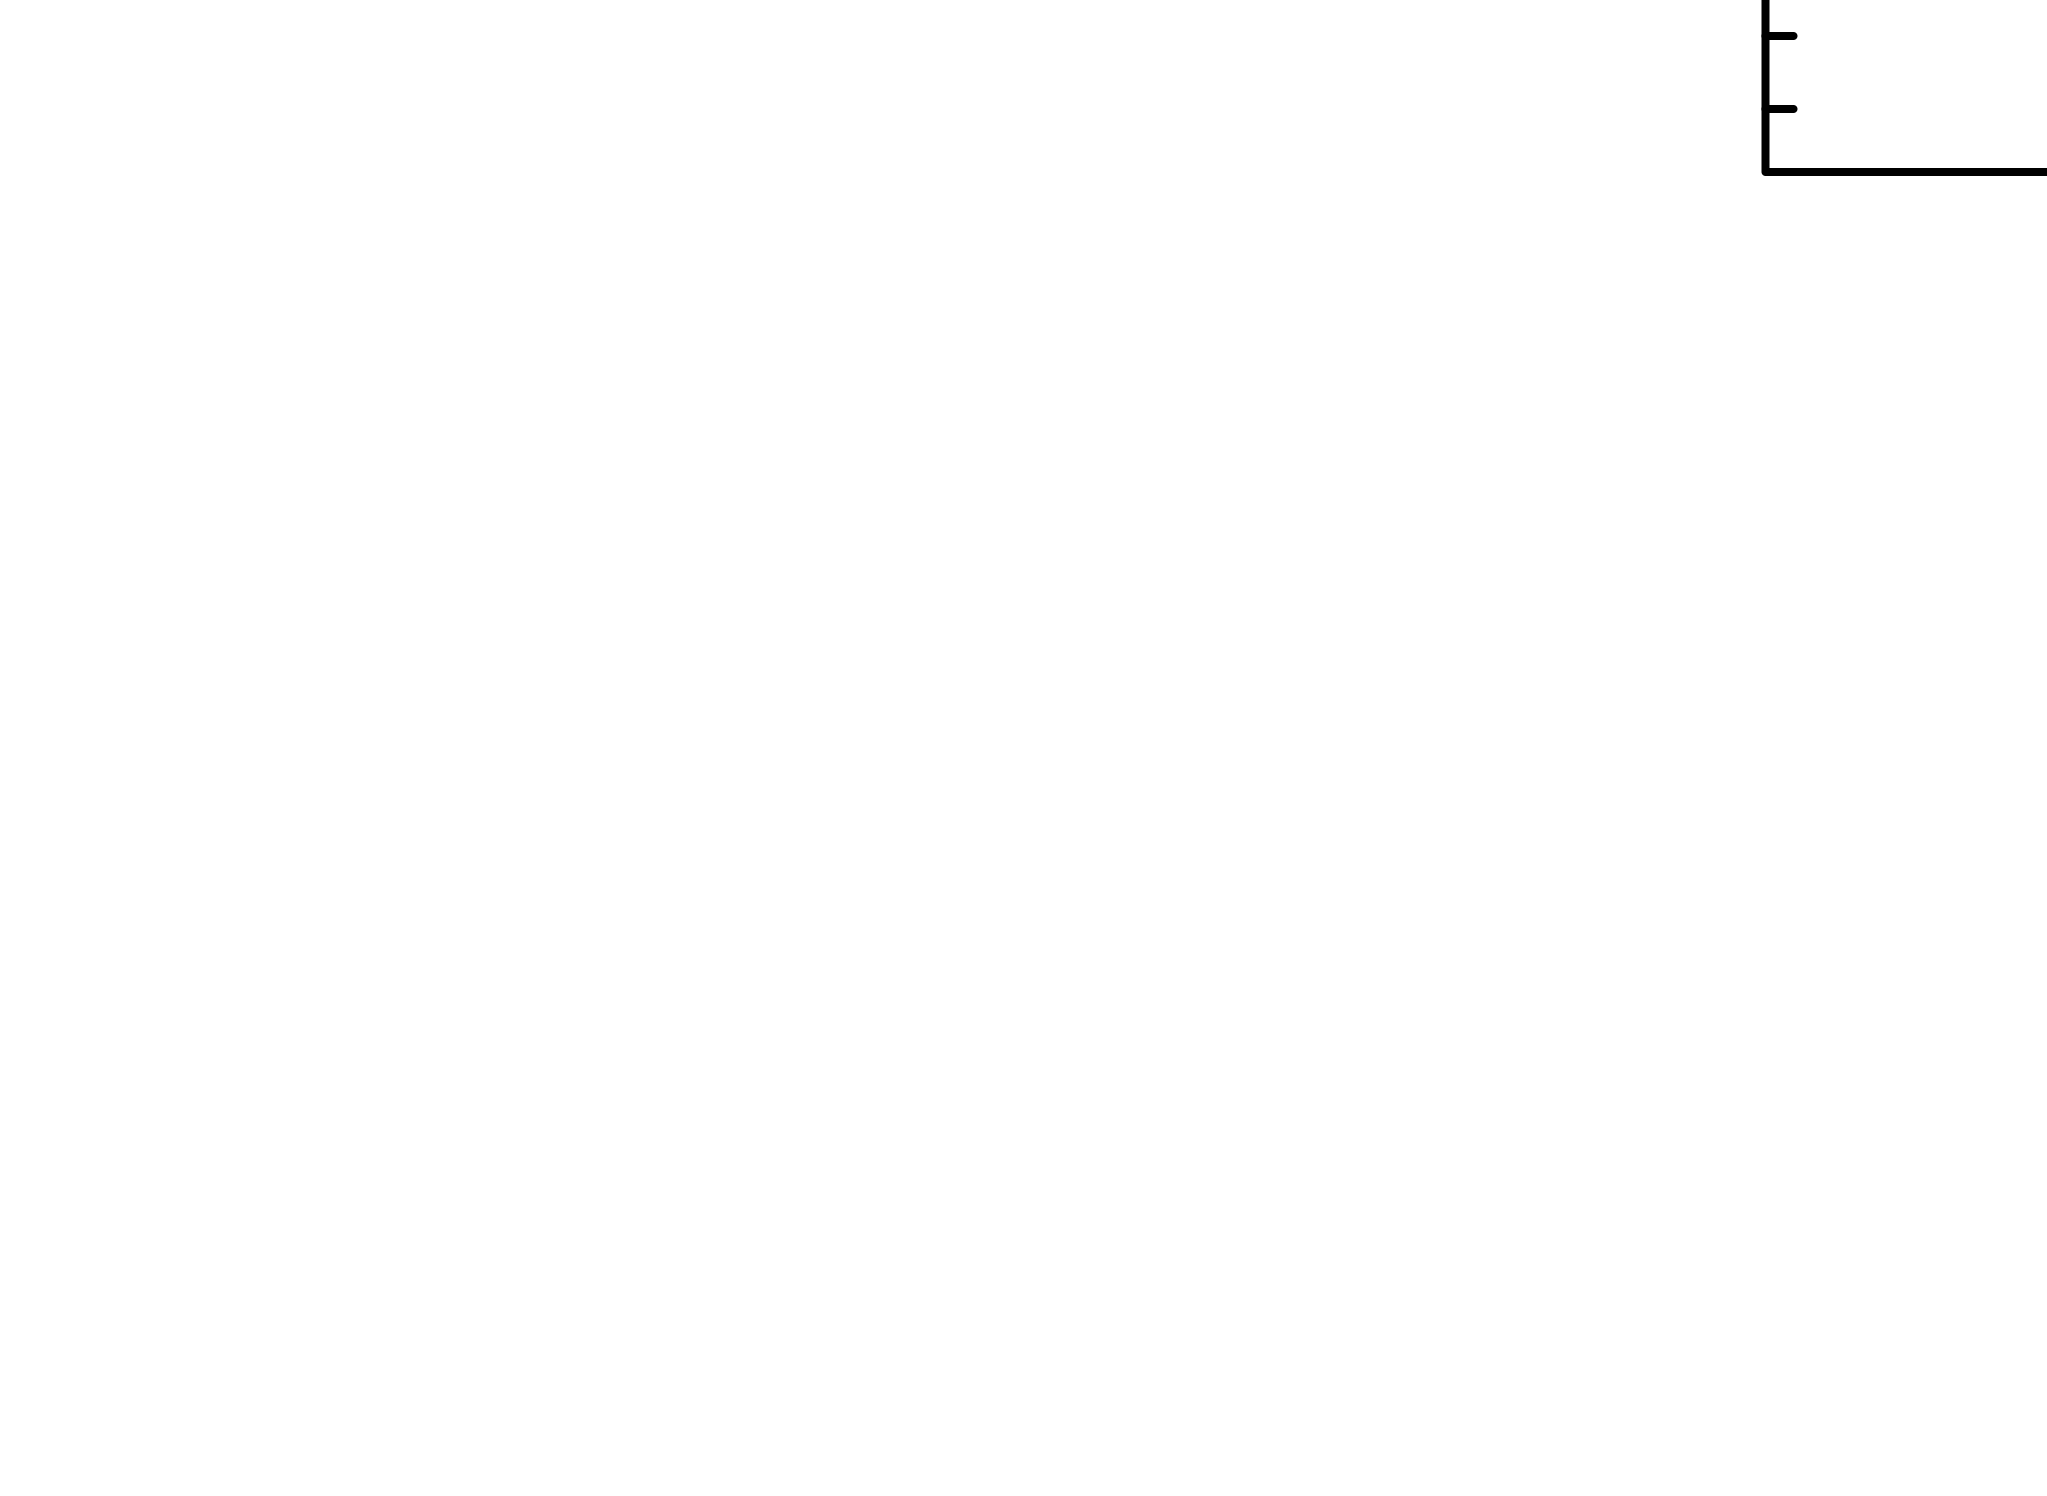

     1        2        5  
 3.8807E-11| -0.0000  -0.0000   1.0000  
 2.5059E-01|  0.9999   0.0145   0.0000  
 2.6886E+03| -0.0145   0.9999  -0.0000  
----------------------------------------

  Covariance Matrix
        1           2           3   
   8.185e-01  -3.907e+01   5.817e-06
  -3.907e+01   2.688e+03  -2.047e-04
   5.817e-06  -2.047e-04   8.661e-11
------------------------------------

Model TBabs<1>*raymond<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.47789      +/-  0.904716     
   2    2   raymond    kT         keV      17.6847      +/-  51.8461      
   3    2   raymond    Abundanc            0.300000     frozen
   4    2   raymond    Redshift            0.0          frozen
   5    2   raymond    norm                3.97206E-05  +/-  9.30666E-06  
________________________________________________________________________


Fit statistic  : Chi-Squared                  2.1203     using 6

In [12]:
AllModels.clear()
mo = Model("tbabs*raymond")
mo.raymond.Abundanc = 0.3
Fit.perform()
Plot("data resid")